<a href="https://colab.research.google.com/github/gio-bis/MLPNS2021/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import os 
import json
import scipy.optimize


In [2]:

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [4]:
!pip install kaggle

In [5]:
!ls kaggle.json

kaggle.json


In [6]:
!chmod 600 kaggle.json

In [7]:
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']


In [8]:
!kaggle datasets list -s stroke

ref                                                            title                                            size  lastUpdated          downloadCount  
-------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  
fedesoriano/stroke-prediction-dataset                          Stroke Prediction Dataset                        67KB  2021-01-26 19:29:28          22779  
mazharkarimi/heart-disease-and-stroke-prevention               Heart Disease and Stroke Prevention               1MB  2018-05-14 10:36:48           7628  
google/tinyquickdraw                                           QuickDraw Sketches                               11GB  2018-04-18 19:38:04           2975  
valkling/tappy-keystroke-data-with-parkinsons-patients         Tappy Keystroke Data with Parkinson's Patients   96MB  2018-02-04 05:41:47           1021  
mpwolke/cusersmarildownloadsstrokecsv                          Stroke 

In [9]:
!kaggle datasets download fedesoriano/stroke-prediction-dataset

stroke-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
!unzip stroke-prediction-dataset.zip

Archive:  stroke-prediction-dataset.zip
replace healthcare-dataset-stroke-data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [11]:
!ls

 busBusses.npy
 busTimeTable.npy
'chimica rel (1).docx.gdoc'
'chimica rel.docx.gdoc'
'Colab Notebooks'
'Copia di Goldstein H. - Meccanica Classica -Pdf - Ita- (2a edizione).pdf'
 country_pop.xls
'Fisica I - Meccanica e Termodinamica - Mazzoldi,  Nigro, Voci.pdf'
 healthcare-dataset-stroke-data.csv
 ispalindrome.py
 kaggle.json
 kalbar_drone_190113-768x512.jpg
'Laboratorio di elettronica_MG (1).gdoc'
'Laboratorio di elettronica_MG (2).gdoc'
'Laboratorio di elettronica_MG.docx'
'Laboratorio di elettronica_MG.gdoc'
 NMR_Biselli_etal_annotata.pdf
 NYC_Women_s_Resource_Network_Database.csv
 __pycache__
 stroke-prediction-dataset.zip
 teoria.docx
'Zero assoluto.docx'


In [12]:
datain = pd.read_csv("healthcare-dataset-stroke-data.csv")
datain

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [13]:
for s in datain.columns:
  print(s, datain[s].dtype)

#o più veloce datain.dtypes

id int64
gender object
age float64
hypertension int64
heart_disease int64
ever_married object
work_type object
Residence_type object
avg_glucose_level float64
bmi float64
smoking_status object
stroke int64


In [15]:
datain.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [16]:
datain.describe().columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

In [17]:
strokeInput = datain[["age", "hypertension", "avg_glucose_level", "bmi"]]

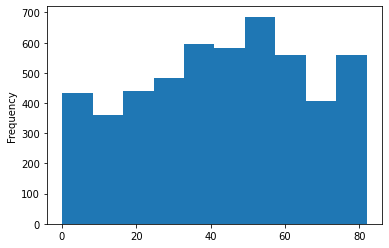

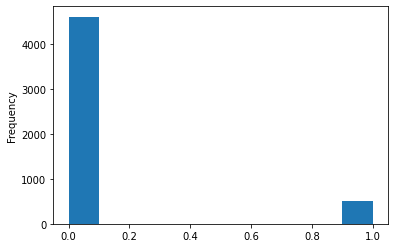

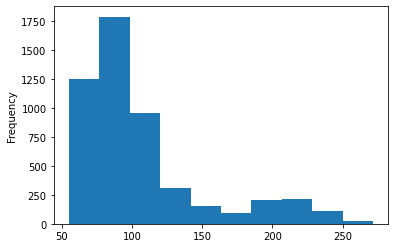

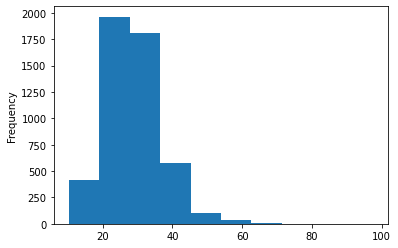

In [18]:
for s in strokeInput.columns:
  pl.figure()
  strokeInput[s].plot(kind='hist')

In [19]:
strokeInput.corr() #restituisce una tabella con la correlazione tra le variabili

,age,hypertension,avg_glucose_level,bmi
age,1.000000,0.276398,0.238171,0.333398
hypertension,0.276398,1.000000,0.174474,0.167811
avg_glucose_level,0.238171,0.174474,1.000000,0.175502
bmi,0.333398,0.167811,0.175502,1.000000


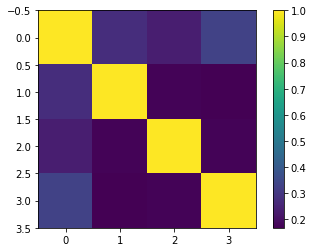

In [20]:
pl.imshow(strokeInput.corr())
pl.colorbar()

In [21]:
import sklearn

In [22]:
from sklearn.model_selection import train_test_split

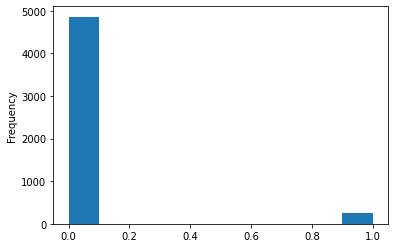

In [25]:
datain.stroke.plot(kind="hist")

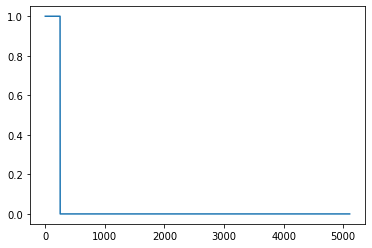

In [26]:
datain.stroke.plot()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(strokeInput, 
                    datain.stroke, test_size=0.2, shuffle = True, random_state=1)
X_train.shape, y_train.shape

#do i dati in imput e in output

#random state importante per la riproducibilità

#shuffle se i dati sono organizzati in maniera non casuale (i nostri sono ordinati)

((4088, 4), (4088,))

In [28]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)  #3 scelto a caso
# Fit the classifier to the data
knn.fit(X_train, y_train)

ValueError: ignored

In [29]:
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [30]:
datain.isna().sum() #conto quanti missing values (NaN) ci sono

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [32]:
#pulisco i dati
cleanstrokeInput = strokeInput.dropna(subset=["bmi"], axis=0)
cleanstrokeInput.shape   

(4909, 4)

In [33]:
target = datain[["bmi","stroke"]].dropna(subset=["bmi"], axis=0).stroke

In [34]:
X_train, X_test, y_train, y_test = train_test_split(cleanstrokeInput, 
                    target, test_size=0.2, random_state=1)
X_train.shape, y_train.shape

((3927, 4), (3927,))

Use spicy spatial to calculate euclidian distance between all points in the data and the first data point (pdist, squarematrix) to get the 3 nearest neighbors of point 0 and label point 0 accordingly


In [35]:
from scipy.spatial import distance

In [50]:
import sklearn.preprocessing
Xscaled = sklearn.preprocessing.scale(X_train, axis=0)

In [52]:
import scipy as sp

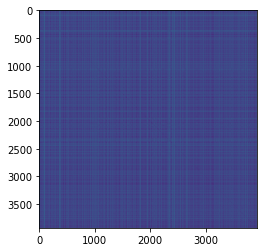

In [53]:
import pylab as pl
pl.imshow(sp.spatial.distance.squareform(sp.spatial.distance.pdist(Xscaled)))

In [54]:
d0i = sp.spatial.distance.squareform(sp.spatial.distance.pdist(Xscaled))[0]
d0i.shape

(3927,)

In [55]:
np.argsort(d0i)

array([   0, 1902, 2564, ...,  420,  931,   99])

In [56]:
d0i[np.argsort(d0i)]

array([ 0.        ,  0.34004583,  0.35266319, ...,  6.70151299,
        8.33000641, 10.66323764])

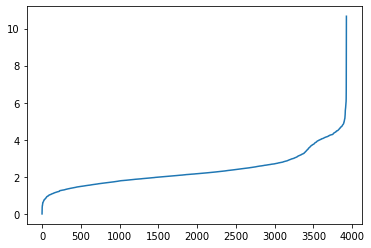

In [58]:
import pylab as pl
pl.plot(d0i[np.argsort(d0i)])

In [60]:
target.iloc[np.argsort(d0i)][1:4] #scelgo 3 oggetti, escludendo lo 0

2007    0
2689    0
1055    0
Name: stroke, dtype: int64

In [62]:
target.iloc[np.argsort(d0i)][1:4].mode()[0]

0

Il mio label è 1, il target 0

In [63]:
target.iloc[np.argsort(d0i)][:5]

0       1
2007    0
2689    0
1055    0
1727    0
Name: stroke, dtype: int64

In [66]:
knn = KNeighborsClassifier(n_neighbors = 3)  #scelgo io 3, ma non c'è una forte motivazione
knn.fit(Xscaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
import sklearn.preprocessing
Xscaled = sklearn.preprocessing

In [67]:
knn.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,

In [70]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(knn, 
          datain[["age", 
        "hypertension", "avg_glucose_level", "bmi"]].dropna(subset=["bmi"],
                                                                       axis=0), 
                    datain[["bmi","stroke"]].dropna(subset=["bmi"],
                                                                       axis=0).stroke, cv=5)
print (" CV average prediction score %.2f"%cv_scores.mean())

 CV average prediction score 0.95


In [71]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(datain[["age", 
        "hypertension", "avg_glucose_level", "bmi"]].dropna(subset=["bmi"],
                                                                       axis=0), 
                    datain[["bmi","stroke"]].dropna(subset=["bmi"],
                                                                       axis=0).stroke)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [72]:
sklearn.metrics.confusion_matrix(y_test, knn_gscv.predict(X_test))

array([[931,   0],
       [ 51,   0]])

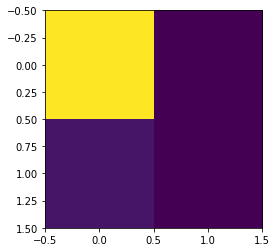

In [73]:
pl.imshow(sklearn.metrics.confusion_matrix(y_test, knn_gscv.predict(X_test)))

In [75]:
(knn_gscv.predict(X_train) == 0).sum()/ X_train.shape[0]

1.0